# 2 - Data Analysis
by: Torres Espinosa, Jose Antonio

In [1]:
# Dependencies
import sys
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Own Modules
sys.path.append('./utils/')
from utils.dataprocesor import Preprocessor

# Data preprocessed from OpenData Api

For prec and rain the preprocessing results will be similar.

Will use 'data-01-02.csv' from **1-data_api.ipynb**. Exist null values, therefore will impute them with KNNImputer()

In [2]:

p = Preprocessor()
# p.dataset.info()

2023-09-19 21:32:13.039 INFO    root: Preprocessor()
2023-09-19 21:32:13,039 [INFO]: root: Preprocessor()
2023-09-19 21:32:13.041 INFO    root: OpenData()
2023-09-19 21:32:13,041 [INFO]: root: OpenData()
2023-09-19 21:32:13.042 INFO    root: read_csv(data/data-01-22.csv)
2023-09-19 21:32:13,042 [INFO]: root: read_csv(data/data-01-22.csv)


There is a big difference between rainy and non-rainy days. So, undersampling will be done in this case. 

<Axes: >

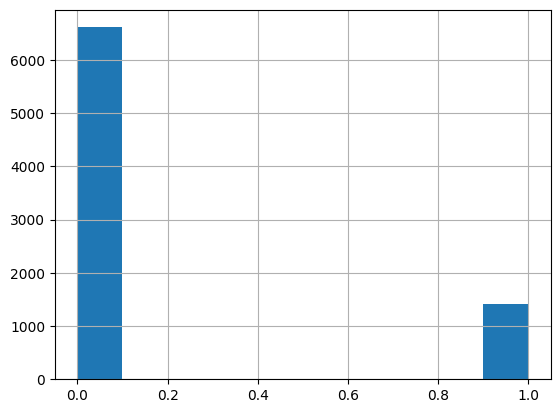

In [3]:
p.dataset['rain'].hist()  # Values for rain class

<Axes: >

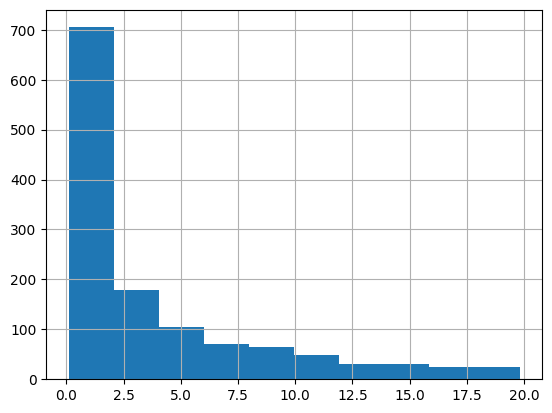

In [4]:
p.dataset.loc[(p.dataset['prec'] > 0) & (p.dataset['prec'] < 20), 'prec'].hist()

## Impute

In [5]:
p.Xy()  # dataset to X and y for prec and rain.
prec_impute = p.impute_data(p.X['prec'])
rain_impute = p.impute_data(p.X['rain'])
prec_impute.info()  # .drop(columns=['dir','racha','tmin'])

2023-09-19 21:32:13.522 INFO    root: Xy(, verbose=False)
2023-09-19 21:32:13,522 [INFO]: root: Xy(, verbose=False)


<class 'pandas.core.frame.DataFrame'>
Index: 7844 entries, 2001-01-01 to 2022-12-31
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tmed      7844 non-null   float64
 1   tmin      7844 non-null   float64
 2   tmax      7844 non-null   float64
 3   dir       7844 non-null   float64
 4   velmedia  7844 non-null   float64
 5   racha     7844 non-null   float64
 6   presMin   7844 non-null   float64
 7   presMax   7844 non-null   float64
dtypes: float64(8)
memory usage: 551.5+ KB


In [6]:
rain_impute.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7844 entries, 2001-01-01 to 2022-12-31
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tmed      7844 non-null   float64
 1   tmin      7844 non-null   float64
 2   tmax      7844 non-null   float64
 3   dir       7844 non-null   float64
 4   velmedia  7844 non-null   float64
 5   racha     7844 non-null   float64
 6   presMin   7844 non-null   float64
 7   presMax   7844 non-null   float64
dtypes: float64(8)
memory usage: 551.5+ KB


A sample of data change.

C:\Users\chala\AppData\Local\Temp\ipykernel_6484\2224723841.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


[]

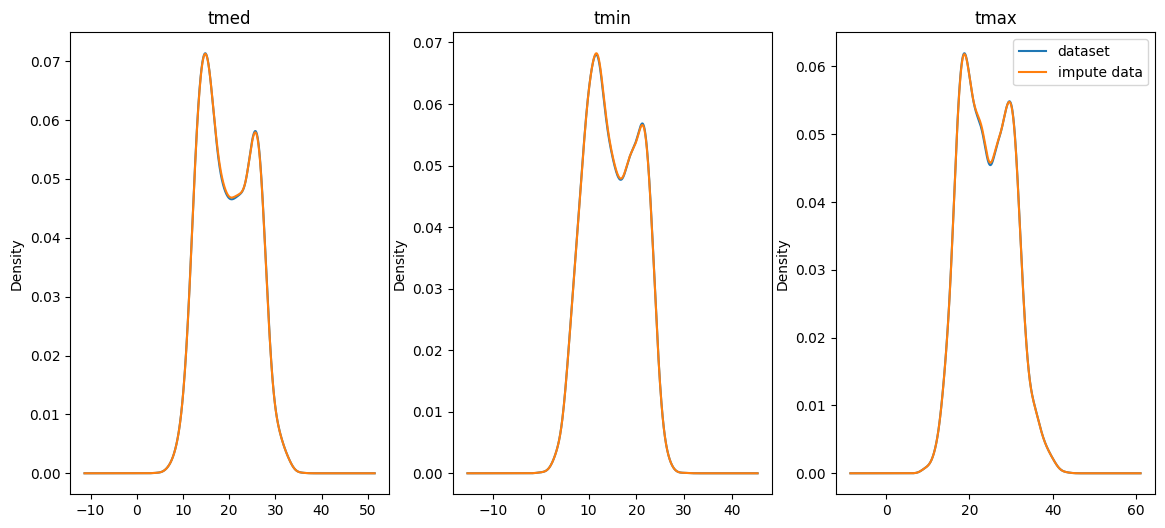

In [7]:
plt.rcParams['figure.figsize'] = (14,6)

plt.title('new data')
plt.subplot(131)
plt.title('tmed')
p.dataset['tmed'].plot(kind='density')
rain_impute['tmed'].plot(kind='density')
plt.subplot(132)
plt.title('tmin')
p.dataset['tmin'].plot(kind='density')
rain_impute['tmin'].plot(kind='density')
plt.subplot(133)
plt.title('tmax')
p.dataset['tmax'].plot(kind='density')
rain_impute['tmax'].plot(kind='density')
plt.legend(['dataset', 'impute data'])
plt.plot()

C:\Users\chala\AppData\Local\Temp\ipykernel_6484\1848382010.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


[]

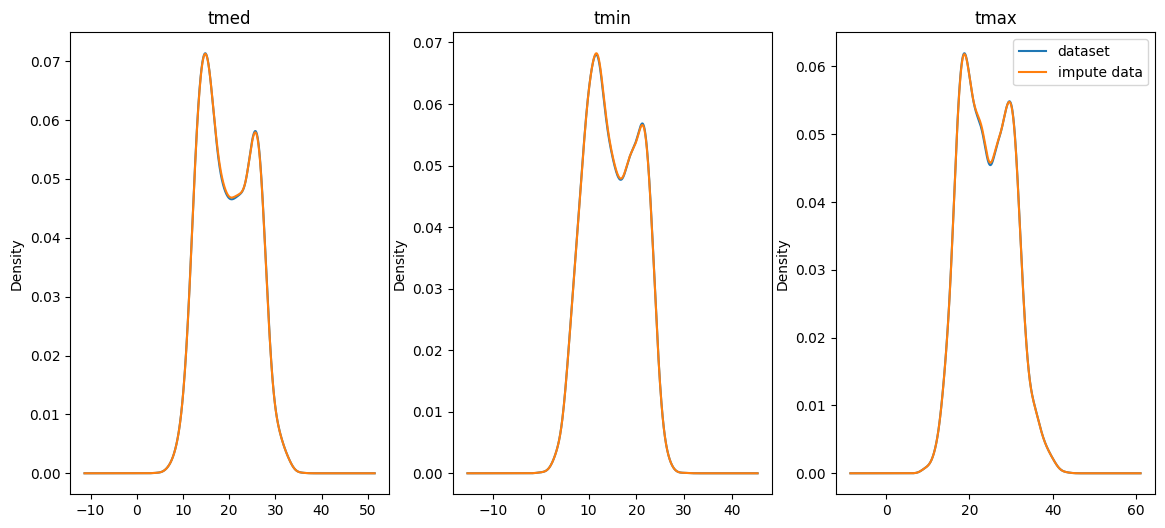

In [8]:
plt.rcParams['figure.figsize'] = (14,6)

plt.title('new data')
plt.subplot(131)
plt.title('tmed')
p.dataset['tmed'].plot(kind='density')
prec_impute['tmed'].plot(kind='density')
plt.subplot(132)
plt.title('tmin')
p.dataset['tmin'].plot(kind='density')
prec_impute['tmin'].plot(kind='density')
plt.subplot(133)
plt.title('tmax')
p.dataset['tmax'].plot(kind='density')
prec_impute['tmax'].plot(kind='density')
plt.legend(['dataset', 'impute data'])
plt.plot()

C:\Users\chala\AppData\Local\Temp\ipykernel_6484\1665537103.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


[]

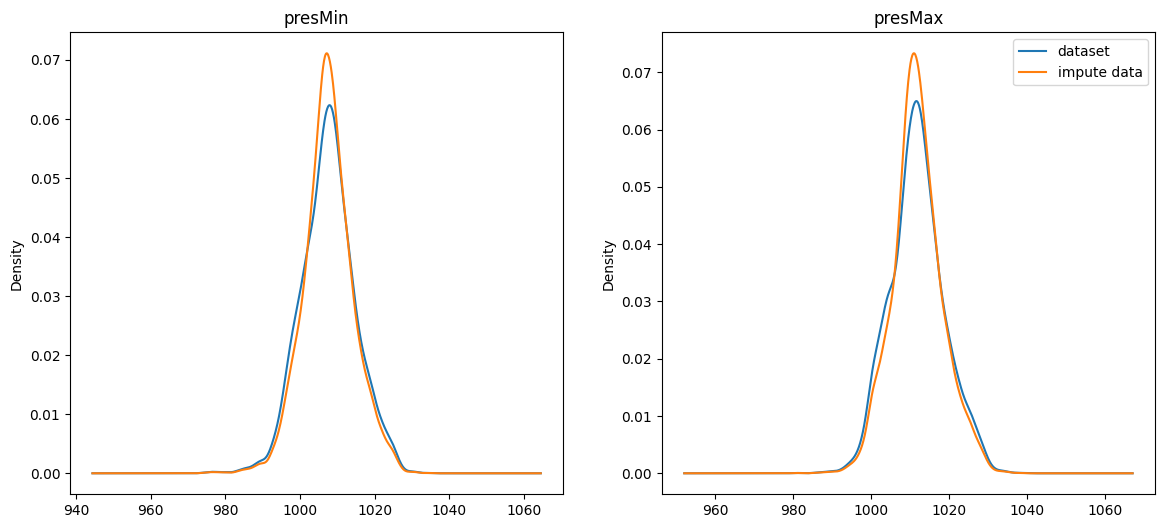

In [9]:
plt.rcParams['figure.figsize'] = (14,6)

plt.title('new data')
plt.subplot(121)
plt.title('presMin')
p.dataset['presMin'].plot(kind='density')
prec_impute['presMin'].plot(kind='density')
plt.subplot(122)
plt.title('presMax')
p.dataset['presMax'].plot(kind='density')
prec_impute['presMax'].plot(kind='density')
plt.legend(['dataset', 'impute data'])
plt.plot()

[]

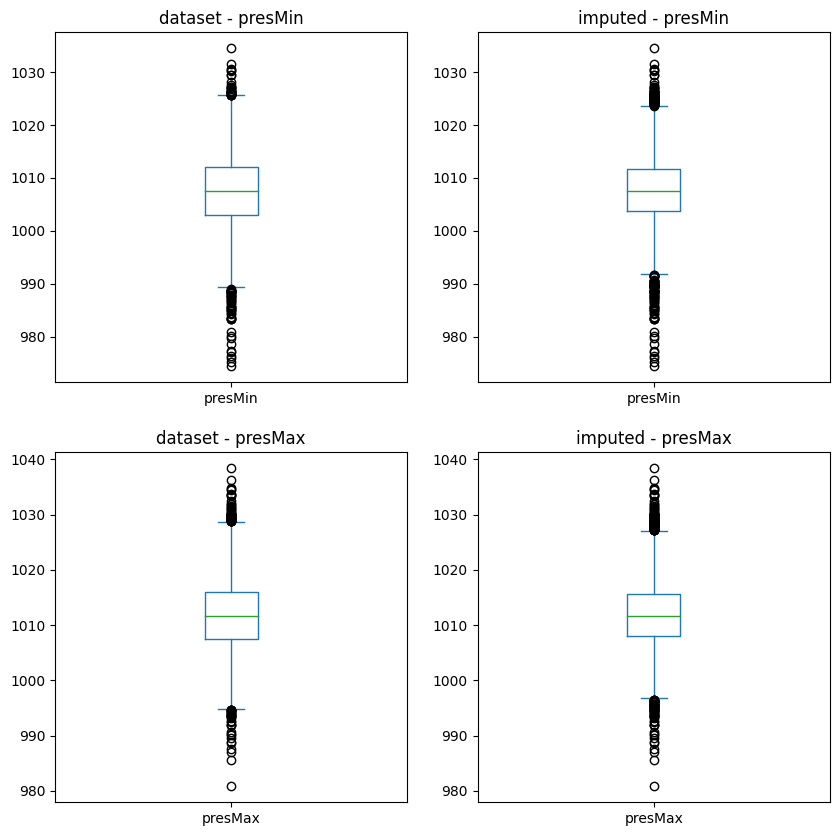

In [10]:
plt.rcParams['figure.figsize'] = (10,10)
# plt.rcParams['figure.facecolor'] = 'white'
# - Clean -
plt.subplot(221)
plt.title('dataset - presMin')
p.dataset['presMin'].plot(kind='box')
plt.subplot(223)
plt.title('dataset - presMax')
p.dataset['presMax'].plot(kind='box')
# - imputed -
plt.subplot(222)
plt.title('imputed - presMin')
prec_impute['presMin'].plot(kind='box')
plt.subplot(224)
plt.title('imputed - presMax')
prec_impute['presMax'].plot(kind='box')
plt.plot()


## Scaled

Now, data will be scaled and will show its distribution.

In [11]:
prec_sc = p.scale_data(prec_impute)
rain_sc = p.scale_data(rain_impute)

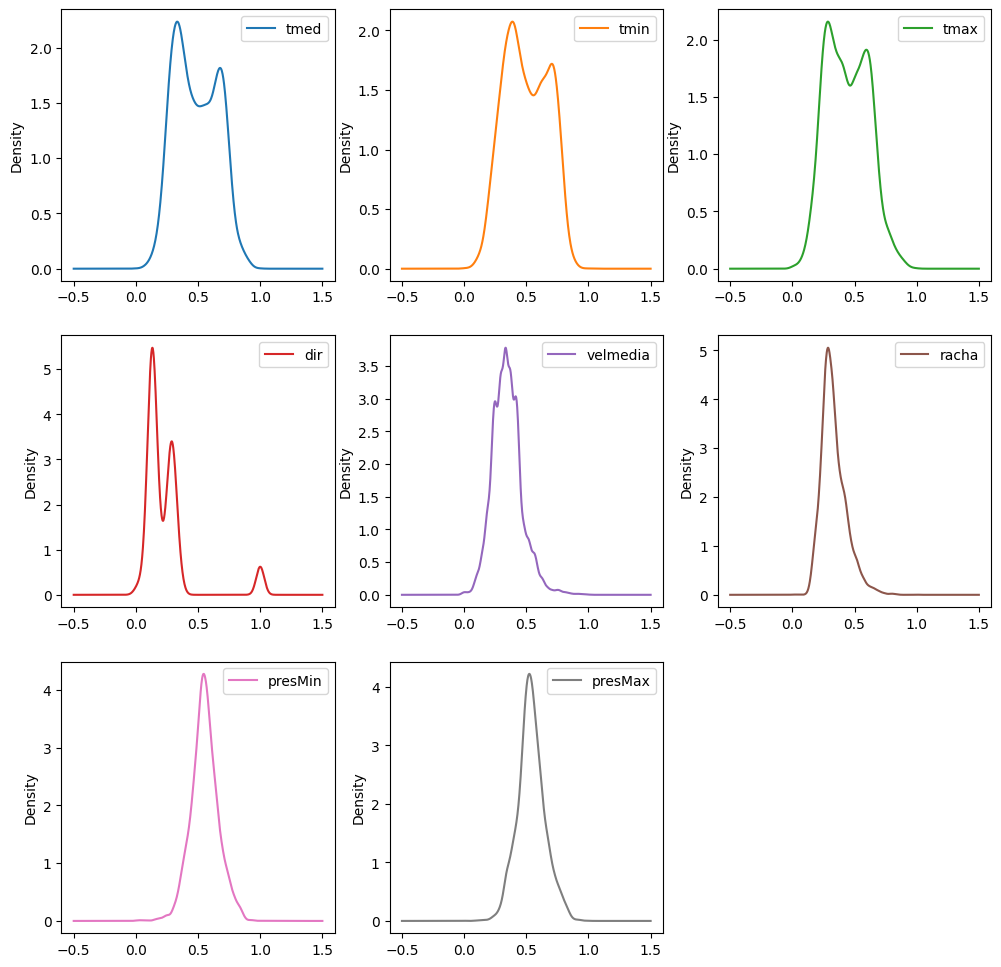

In [12]:
plt.rcParams['figure.figsize'] = (12,12)
fig = rain_sc.plot(kind='density', subplots=True, layout=(3,3),sharex=False)

Results:

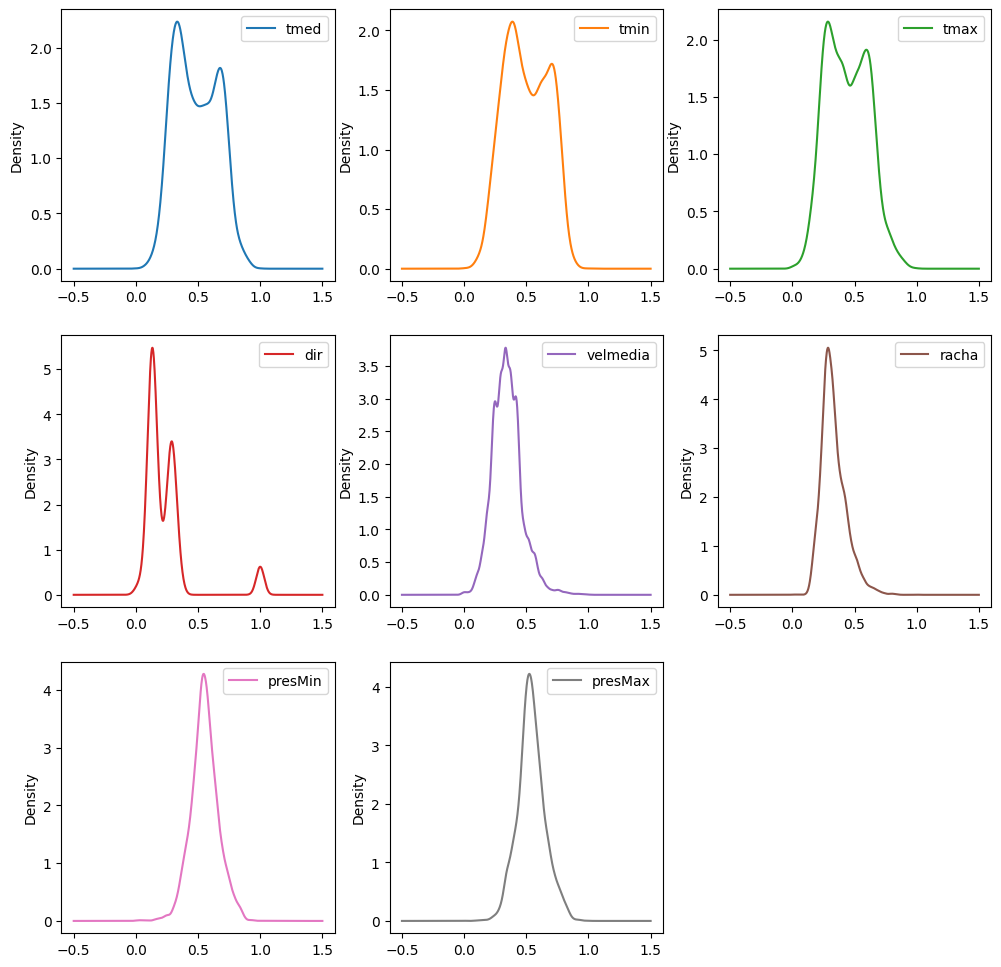

In [13]:
plt.rcParams['figure.figsize'] = (12,12)
fig = prec_sc.plot(kind='density', subplots=True, layout=(3,3),sharex=False)

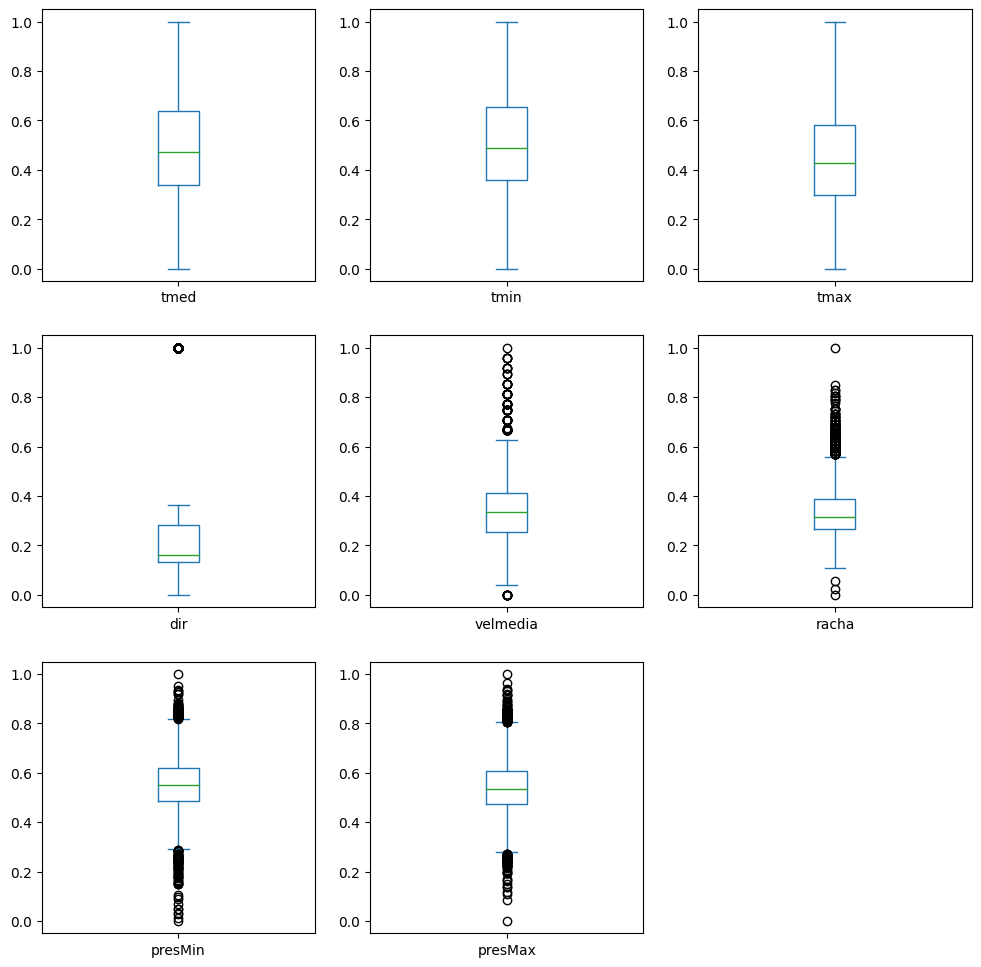

In [14]:
fig = prec_sc.plot(kind='box', subplots=True, layout=(3,3),sharex=False,sharey=False)

The dir outliers are due to variable wind.

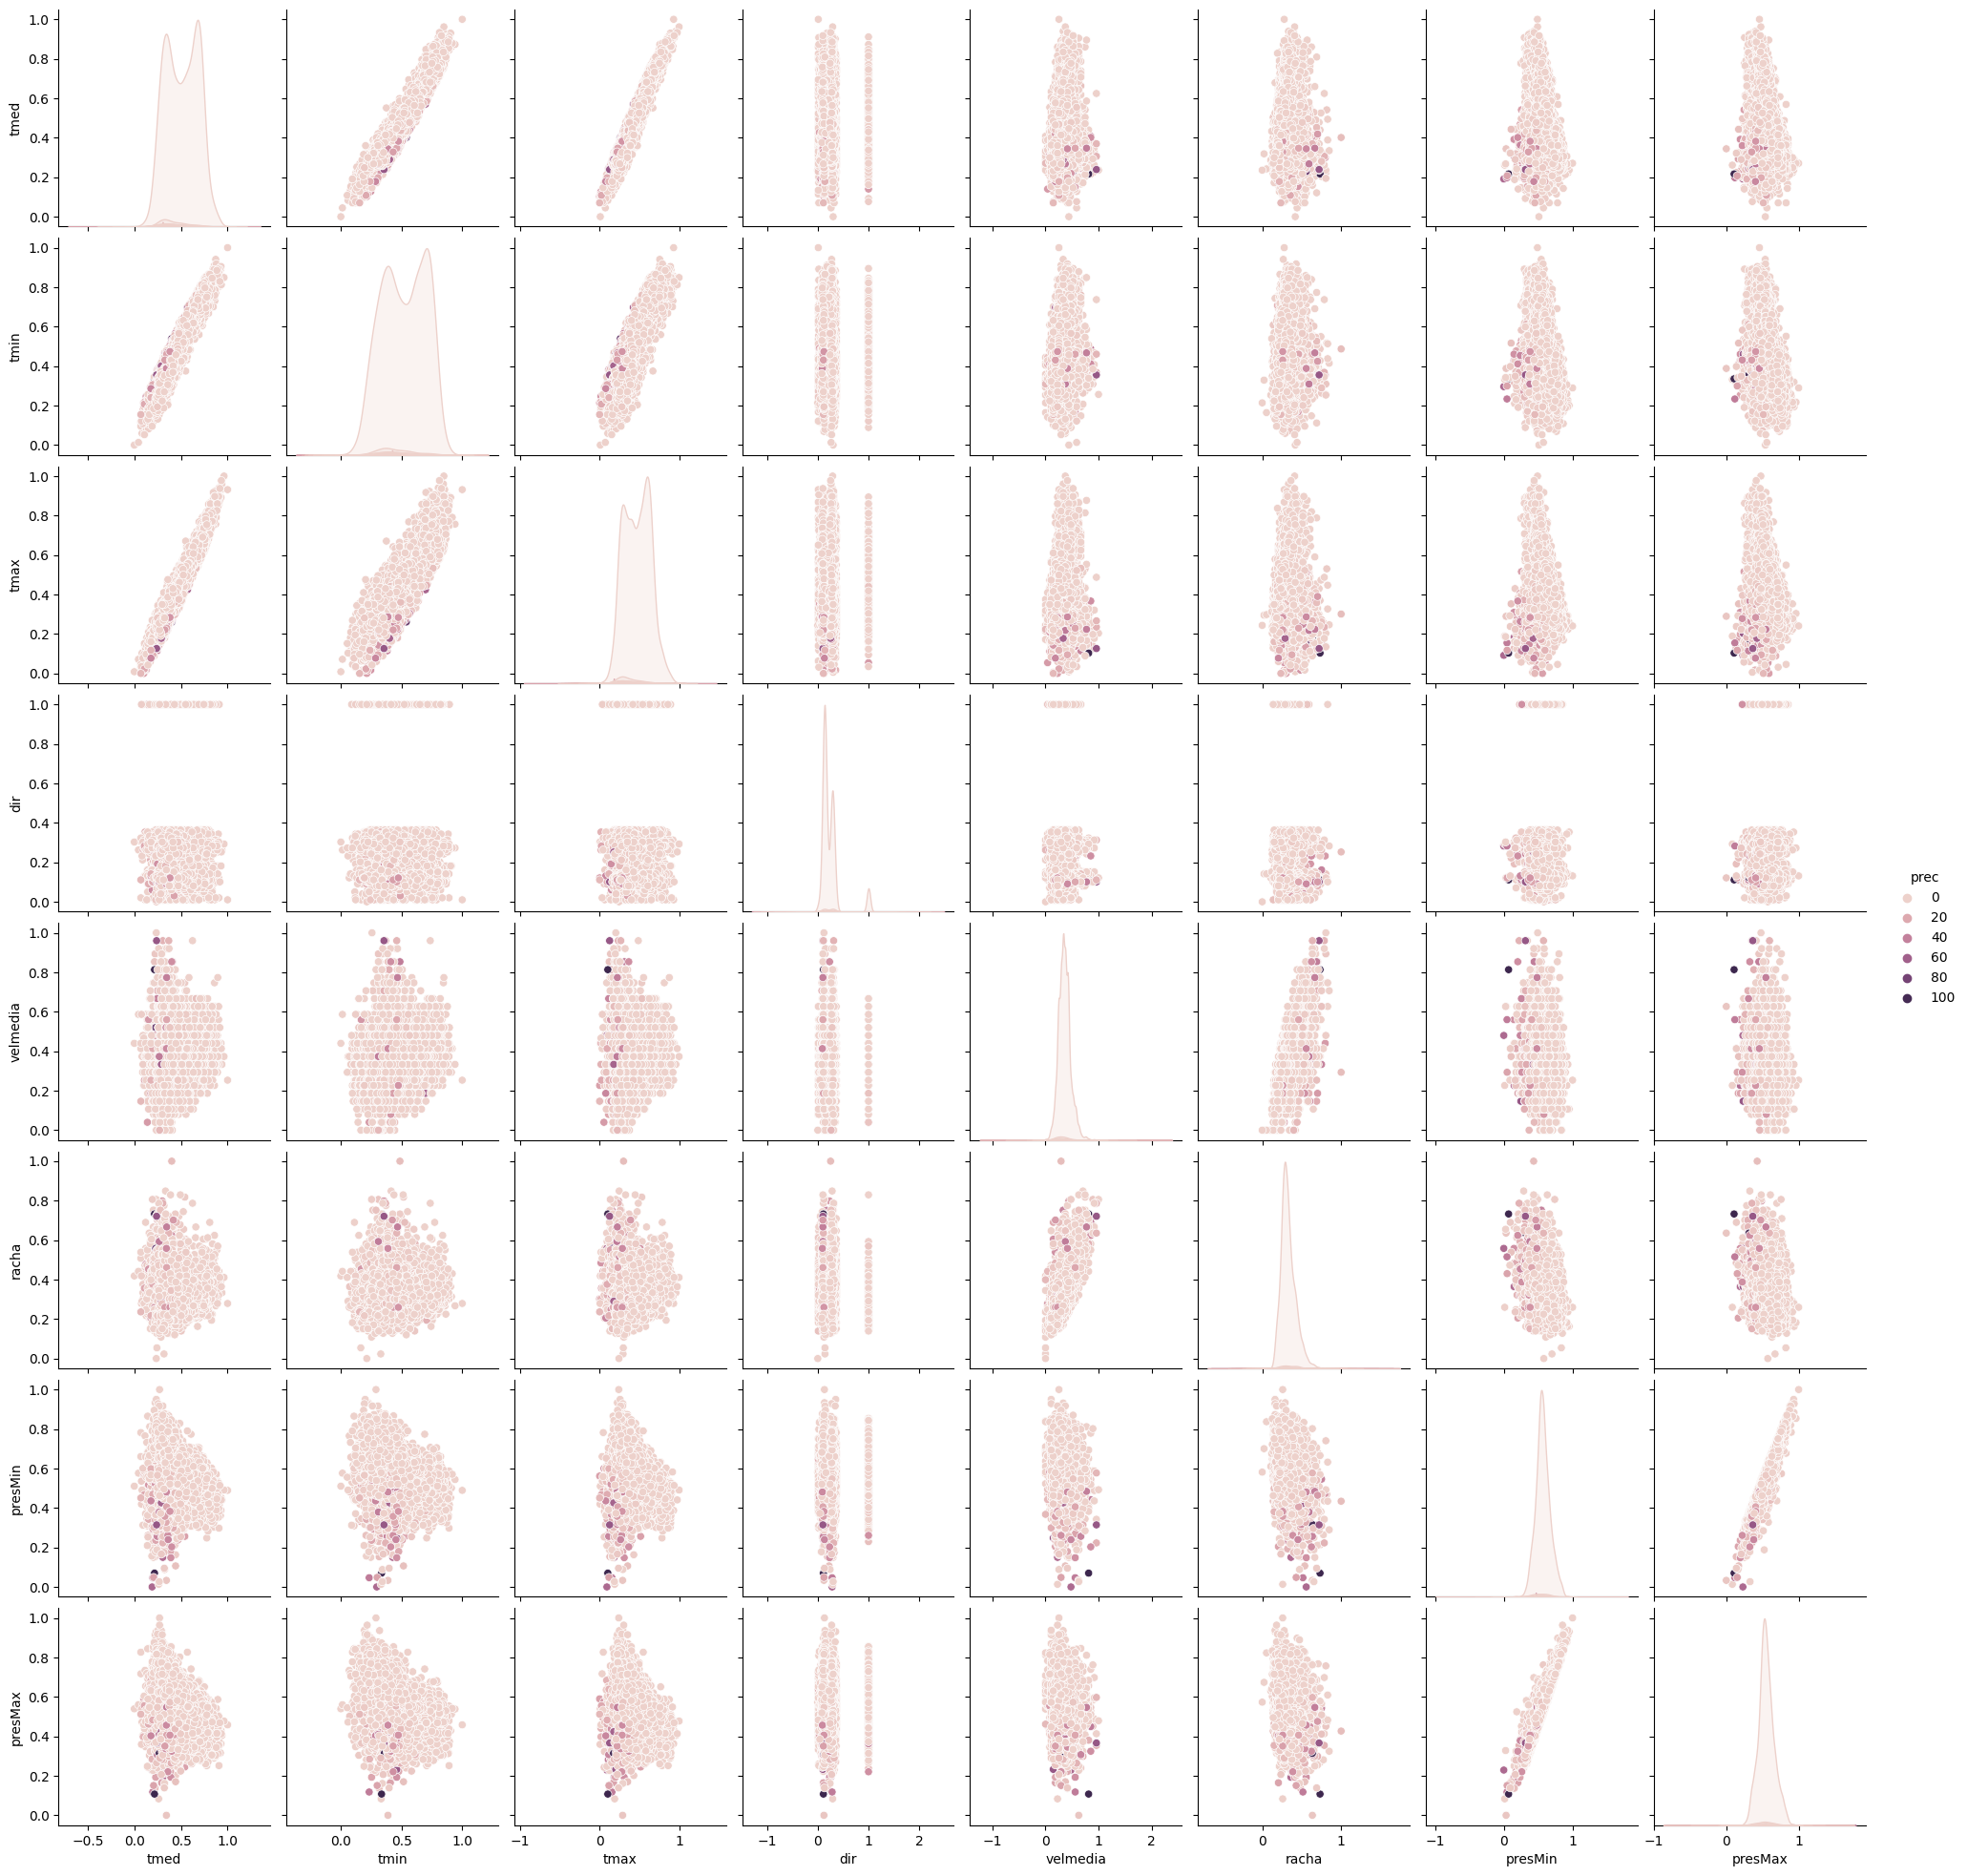

In [15]:
#sns.set_theme(style='ticks')
plt.rcParams['figure.figsize'] = (10,10)
sns.pairplot(pd.concat([prec_sc,p.y['prec']], axis=1), hue="prec")
plt.show()

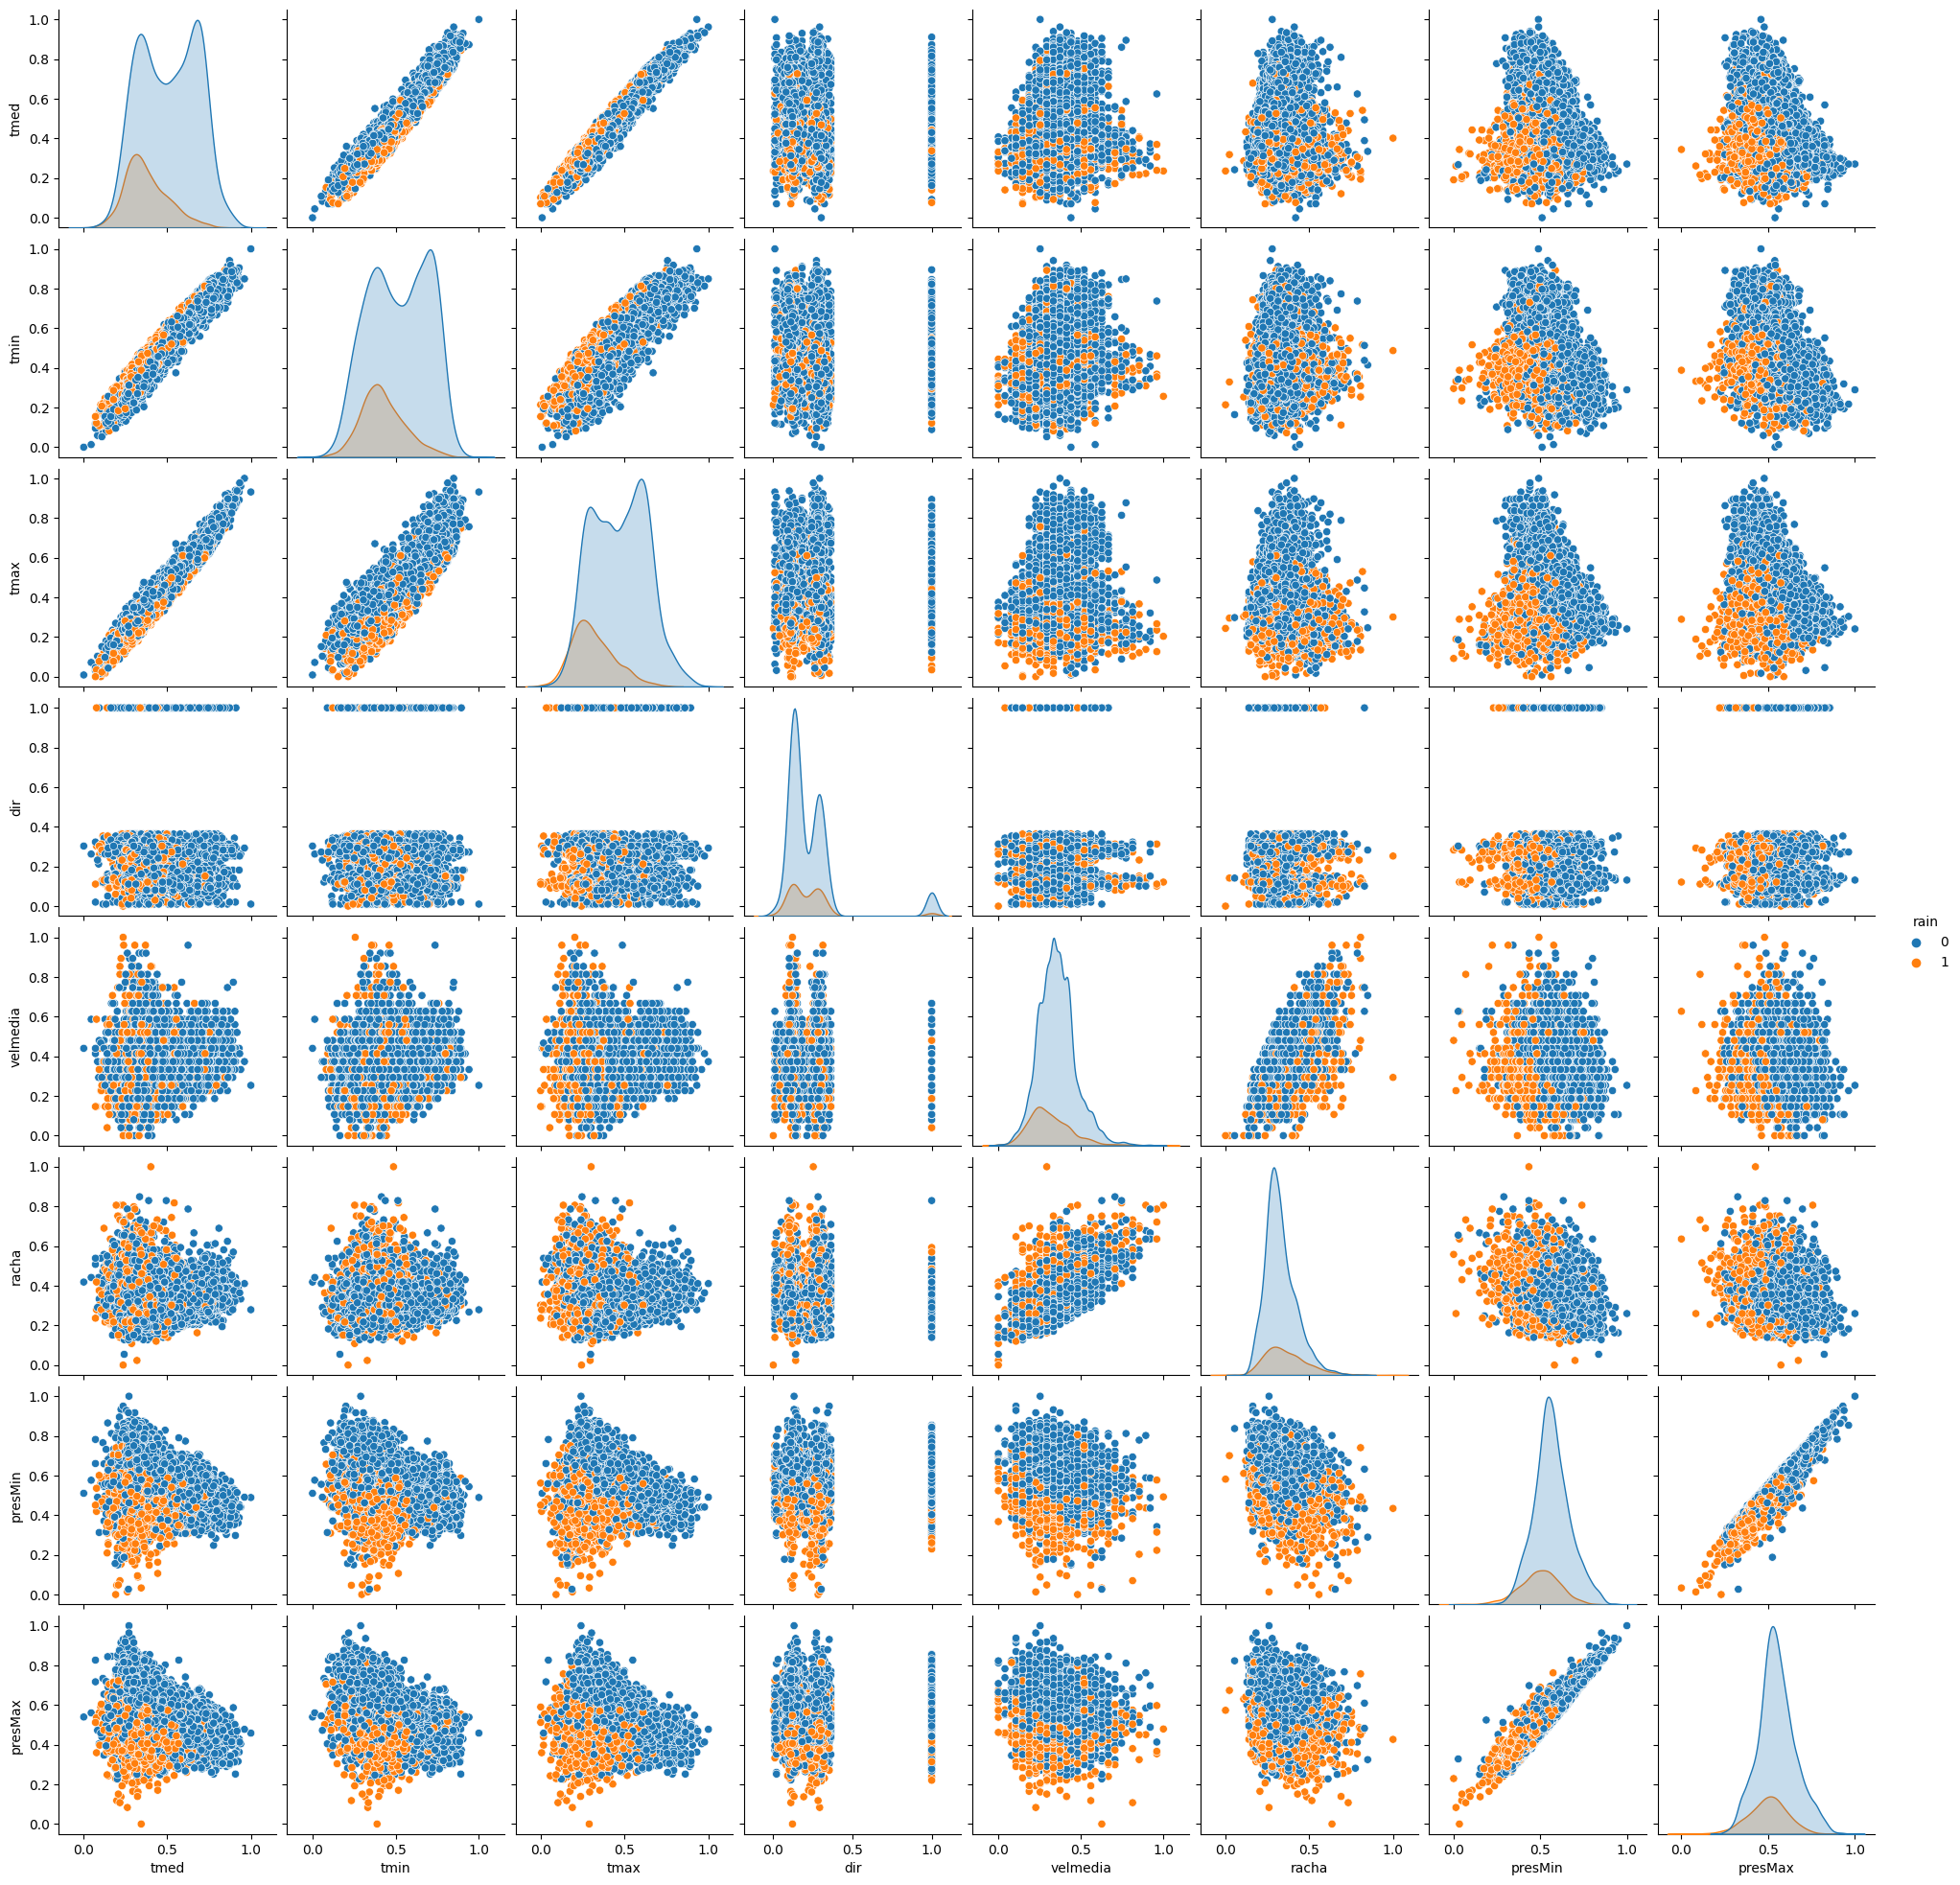

In [16]:
#sns.set_theme(style='ticks')
plt.rcParams['figure.figsize'] = (10,10)
sns.pairplot(pd.concat([rain_sc,p.y['rain']], axis=1), hue="rain")
plt.show()

In [17]:
data = pd.concat([prec_sc,p.y['prec']], axis=1)
correlations = data.corr()

fig = px.imshow(correlations, color_continuous_scale='viridis',
        x=data.columns,y=data.columns)
fig.update_xaxes(side="top")

In [18]:
correlations

tmed      tmin      tmax       dir  velmedia     racha  \
tmed      1.000000  0.968161  0.974125 -0.067583  0.188715 -0.066190   
tmin      0.968161  1.000000  0.886610 -0.090067  0.215236 -0.018597   
tmax      0.974125  0.886610  1.000000 -0.043733  0.154504 -0.105474   
dir      -0.067583 -0.090067 -0.043733  1.000000 -0.007505  0.024639   
velmedia  0.188715  0.215236  0.154504 -0.007505  1.000000  0.618953   
racha    -0.066190 -0.018597 -0.105474  0.024639  0.618953  1.000000   
presMin  -0.265488 -0.307010 -0.213663 -0.042086 -0.142497 -0.252661   
presMax  -0.369931 -0.406446 -0.316979 -0.024738 -0.128869 -0.173064   
prec     -0.170488 -0.102971 -0.221872 -0.042376 -0.016999  0.137465   

           presMin   presMax      prec  
tmed     -0.265488 -0.369931 -0.170488  
tmin     -0.307010 -0.406446 -0.102971  
tmax     -0.213663 -0.316979 -0.221872  
dir      -0.042086 -0.024738 -0.042376  
velmedia -0.142497 -0.128869 -0.016999  
racha    -0.252661 -0.173064  0.137465  
presMin   1.000000  0.958931 -0.182602  
presMax   0.958931  1.000000 -0.136890  
prec     -0.182602 -0.136890  1.000000

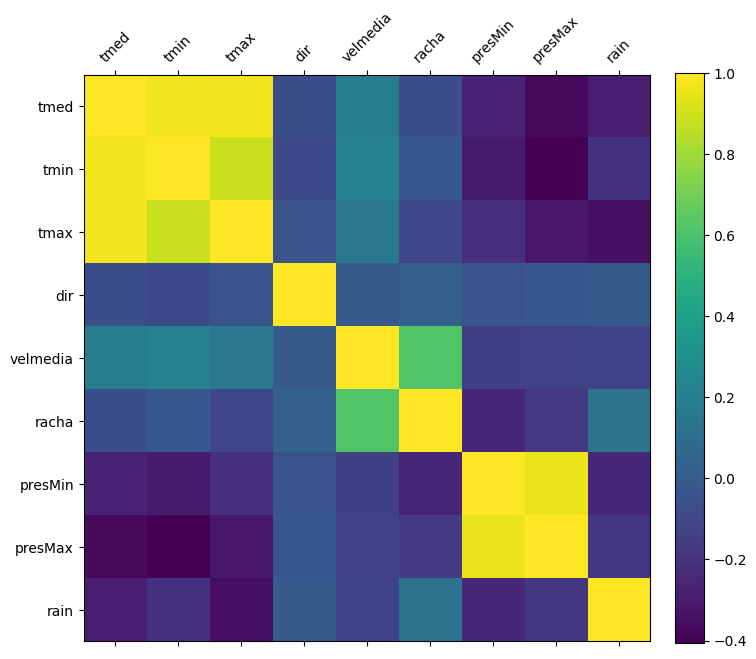

In [19]:
plt.rcParams['figure.figsize'] = (8,8)

#correlations = rain_sc.corr()
correlations = pd.concat([rain_sc,p.y['rain']], axis=1).corr()

fig = plt.figure()
cax = plt.matshow(correlations, fignum=fig.number)
plt.xticks(range(correlations.shape[1]), correlations.columns, rotation=45)
plt.yticks(range(correlations.shape[1]), correlations.columns)
fig.colorbar(cax, fraction=0.046, pad=0.04)

In [20]:
correlations

tmed      tmin      tmax       dir  velmedia     racha  \
tmed      1.000000  0.968161  0.974125 -0.067583  0.188715 -0.066190   
tmin      0.968161  1.000000  0.886610 -0.090067  0.215236 -0.018597   
tmax      0.974125  0.886610  1.000000 -0.043733  0.154504 -0.105474   
dir      -0.067583 -0.090067 -0.043733  1.000000 -0.007505  0.024639   
velmedia  0.188715  0.215236  0.154504 -0.007505  1.000000  0.618953   
racha    -0.066190 -0.018597 -0.105474  0.024639  0.618953  1.000000   
presMin  -0.265488 -0.307010 -0.213663 -0.042086 -0.142497 -0.252661   
presMax  -0.369931 -0.406446 -0.316979 -0.024738 -0.128869 -0.173064   
rain     -0.287244 -0.202953 -0.347776 -0.010674 -0.124033  0.128514   

           presMin   presMax      rain  
tmed     -0.265488 -0.369931 -0.287244  
tmin     -0.307010 -0.406446 -0.202953  
tmax     -0.213663 -0.316979 -0.347776  
dir      -0.042086 -0.024738 -0.010674  
velmedia -0.142497 -0.128869 -0.124033  
racha    -0.252661 -0.173064  0.128514  
presMin   1.000000  0.958931 -0.243131  
presMax   0.958931  1.000000 -0.179696  
rain     -0.243131 -0.179696  1.000000

# PCA

In [21]:
rain_pca2, ratio = p.select_attr(rain_sc, 'PCA', n_components=2)

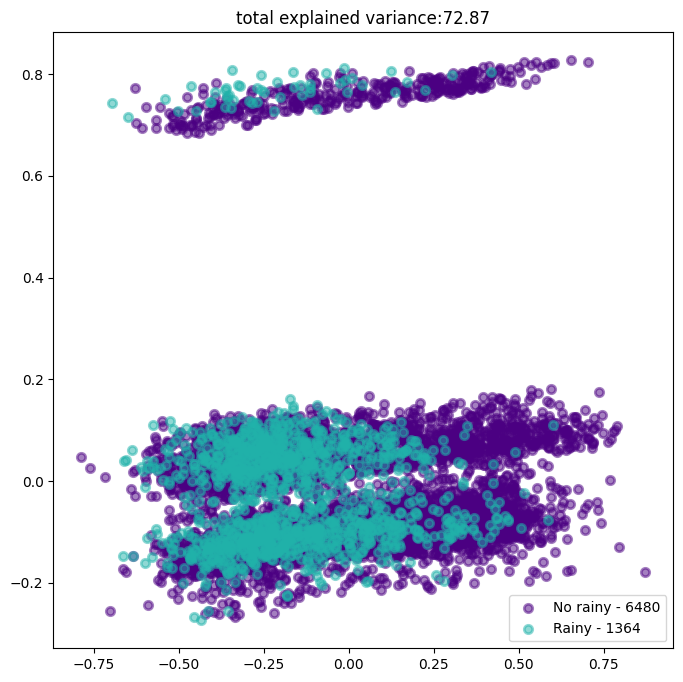

In [22]:
plt.figure()
colors = ['indigo', 'lightseagreen']
# colors = ['lightseagreen', 'indigo']
lw = 2
for color, i, target_name in zip(colors, [0, 1], [f'No rainy', 'Rainy']):
    mask = p.y['rain'] == i
    plt.scatter(rain_pca2[mask, 0], rain_pca2[mask, 1],
                color=color, alpha=.5, lw=lw, label=target_name + f' - {mask.sum()}')
plt.legend(loc='best', scatterpoints=1)
plt.title(f'total explained variance:{ratio.sum()*100:.2f}')
plt.show()

In [23]:
prec_pca2, ratio = p.select_attr(prec_sc, 'PCA', n_components=2)

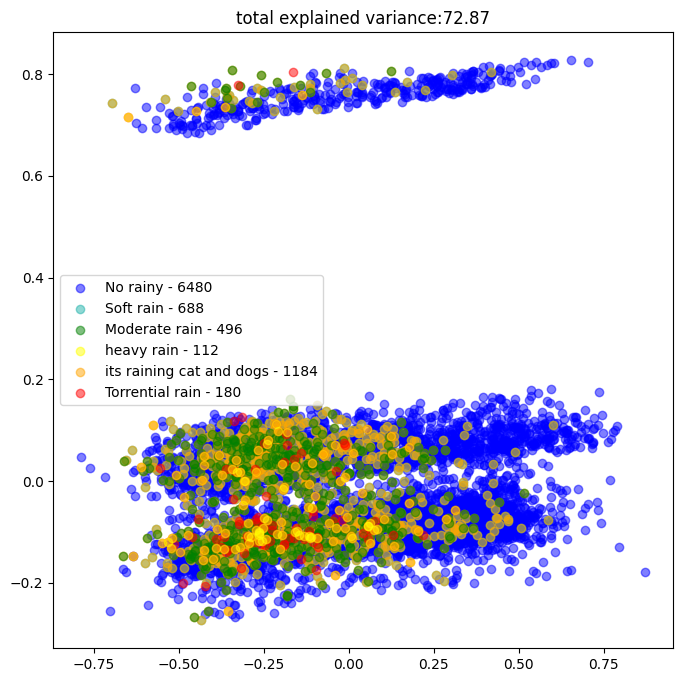

In [24]:
plt.figure()
colors = ['lightseagreen', 'pink','indigo']
lw = 1
ph = .5
# NO RAIN
mask = p.y['prec'] == 0
plt.scatter(prec_pca2[mask, 0], prec_pca2[mask, 1],
            color='blue', alpha=ph, lw=lw, label=f'No rainy - {mask.sum()}')
# SOFT
mask = (p.y['prec'] > 0) & (p.y['prec'] <= 2)
plt.scatter(prec_pca2[mask, 0], prec_pca2[mask, 1], zorder=3,
            color='lightseagreen', alpha=ph, lw=lw, label=f'Soft rain - {mask.sum()}')
# MOEDERATE
mask = (p.y['prec'] > 2) & (p.y['prec'] <= 15)
plt.scatter(prec_pca2[mask, 0], prec_pca2[mask, 1], zorder=4,
            color='green', alpha=ph, lw=lw, label=f'Moderate rain - {mask.sum()}')
# HEAVY
mask = (p.y['prec'] > 15) & (p.y['prec'] <= 30)
plt.scatter(prec_pca2[mask, 0], prec_pca2[mask, 1], zorder=6,
            color='yellow', alpha=ph, lw=lw, label=f'heavy rain - {mask.sum()}')
# A LOT OF
mask = (p.y['prec'] > 0) & (p.y['prec'] < 15)
plt.scatter(prec_pca2[mask, 0], prec_pca2[mask, 1], zorder=3,
            color='orange', alpha=ph, lw=lw, label=f'its raining cat and dogs - {mask.sum()}')
# TORRENTIAL
mask = (p.y['prec'] > 0) & (p.y['prec'] > 15)
plt.scatter(prec_pca2[mask, 0], prec_pca2[mask, 1], zorder=5,
            color='red', alpha=ph, lw=lw, label=f'Torrential rain - {mask.sum()}')

plt.legend(scatterpoints=1)
plt.title(f'total explained variance:{ratio.sum()*100:.2f}')
plt.show()

## Kbest

In [25]:
# Classification ratios
rain_kb_clf, ratio1 = p.select_attr(rain_sc, 'Kbest', y=p.y['rain'], k='all',
                               score_func='f_classif')
rain_kb_chi2, ratio2 = p.select_attr(rain_sc, 'Kbest', y=p.y['rain'], k='all',
                               score_func='chi2')
rain_kb, ratio3 = p.select_attr(rain_sc, 'Kbest', y=p.y['rain'], k='all',
                               score_func='mutual_info_classif')

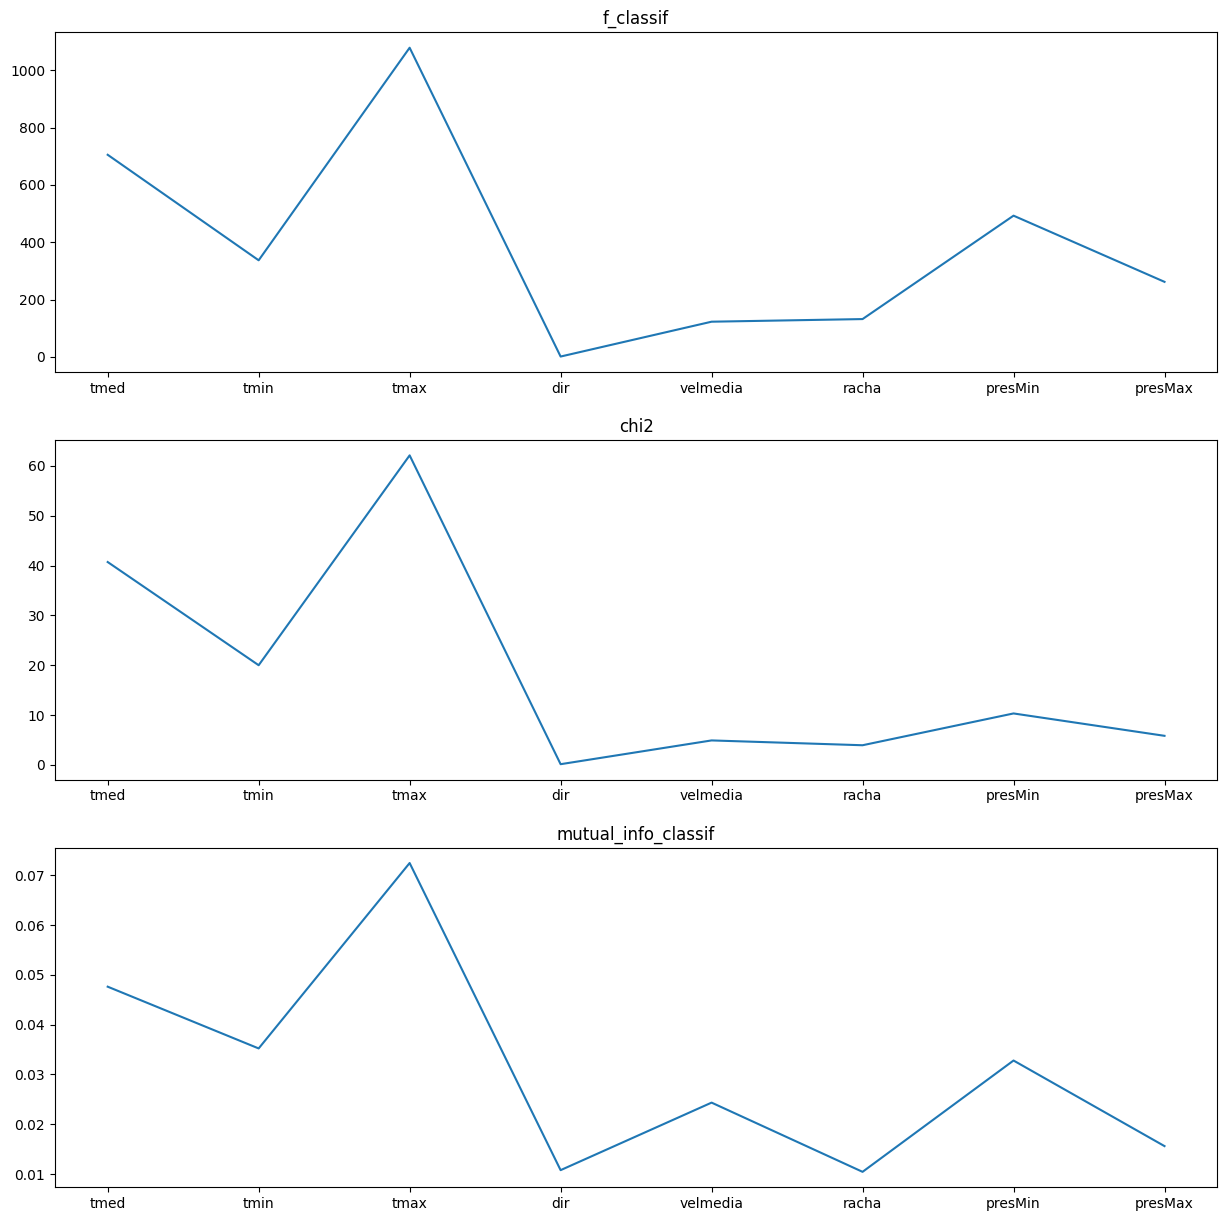

In [26]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 15]
targets = rain_sc.columns
# - Graph 1 -
plt.subplot(3,1,1)
plt.plot(targets, ratio1)
plt.title(f"f_classif")
# - Graph 2 -
plt.subplot(3,1,2)
plt.plot(targets, ratio2)
plt.title("chi2")
# - Graph 3 -
plt.subplot(3,1,3)
plt.plot(targets, ratio3)
plt.title("mutual_info_classif")

plt.show()

In [27]:
# Regression ratios
rain_kb_clf, ratio1 = p.select_attr(prec_sc, 'Kbest', y=p.y['prec'], k='all',
                               score_func='f_classif')

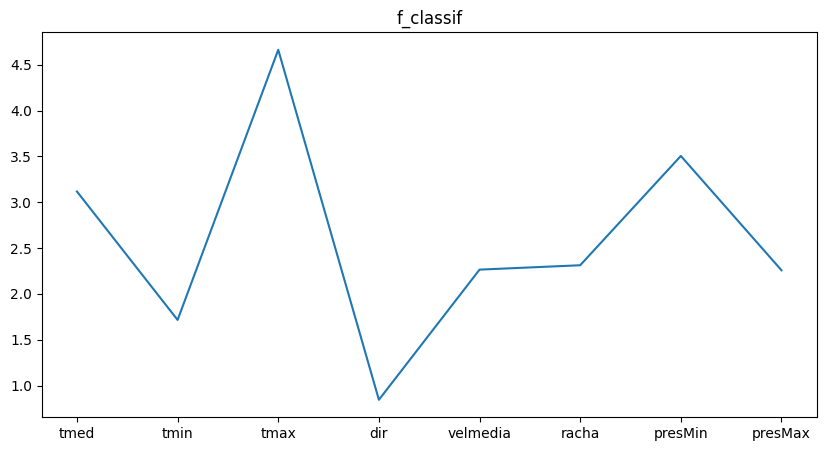

In [28]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]
targets = prec_sc.columns

plt.plot(targets, ratio1)
plt.title(f"f_classif")

plt.show()